# RiboSeq Home Task
## Ксения Дейниченко
## мАДБМ - 19

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from BCBio import GFF
import matplotlib.pyplot as plt

In [2]:
expressions = pd.read_csv('01. RiboSeq_RNASeq_HCC_counts.tsv',sep = '\t', index_col = 1)
expressions.head(9)

,geneID,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,...,218,457,0,0,200,889,0,0,161,857.0
TNMD,ENSG00000000005.5,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,NaN
DPM1,ENSG00000000419.12,168,239,88,187,114,439,66,201,325,...,92,170,109,357,60,244,141,173,56,83.0
SCYL3,ENSG00000000457.13,65,121,60,106,36,163,70,156,130,...,127,176,67,176,55,261,64,100,68,176.0
C1orf112,ENSG00000000460.16,8,43,18,70,16,76,4,63,44,...,124,437,7,167,34,201,6,61,9,58.0
FGR,ENSG00000000938.12,0,6,19,9,14,13,61,24,15,...,94,13,3,9,42,26,7,10,26,57.0
CFH,ENSG00000000971.15,20021,1902,5339,443,18200,34652,3956,9324,46412,...,2824,5456,24558,12238,4117,3431,19747,27766,3011,6181.0
FUCA2,ENSG00000001036.13,195,802,199,432,124,871,128,424,414,...,318,501,156,1633,160,1011,153,284,95,186.0
GCLC,ENSG00000001084.10,435,677,641,797,447,4130,536,3757,1148,...,695,1677,469,355,822,300,448,414,453,679.0


In [3]:
del expressions['geneID']

In [4]:
expressions.head(9)

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
TNMD,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,NaN
DPM1,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
SCYL3,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
C1orf112,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0
FGR,0,6,19,9,14,13,61,24,15,62,...,94,13,3,9,42,26,7,10,26,57.0
CFH,20021,1902,5339,443,18200,34652,3956,9324,46412,1579,...,2824,5456,24558,12238,4117,3431,19747,27766,3011,6181.0
FUCA2,195,802,199,432,124,871,128,424,414,171,...,318,501,156,1633,160,1011,153,284,95,186.0
GCLC,435,677,641,797,447,4130,536,3757,1148,316,...,695,1677,469,355,822,300,448,414,453,679.0


In [5]:
expressions.T[expressions.columns.str.endswith('RNA')].T

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneSymbol,,,,,,,,,,,,,,,,,,,,
TSPAN6,402.0,873.0,301.0,1627.0,258.0,65.0,226.0,353.0,208.0,399.0,153.0,361.0,157.0,333.0,218.0,457.0,200.0,889.0,161.0,857.0
TNMD,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
DPM1,88.0,187.0,66.0,201.0,80.0,16.0,54.0,165.0,57.0,174.0,61.0,155.0,104.0,114.0,92.0,170.0,60.0,244.0,56.0,83.0
SCYL3,60.0,106.0,70.0,156.0,77.0,67.0,78.0,68.0,97.0,128.0,76.0,185.0,114.0,74.0,127.0,176.0,55.0,261.0,68.0,176.0
C1orf112,18.0,70.0,4.0,63.0,60.0,4.0,17.0,112.0,28.0,14.0,8.0,118.0,25.0,98.0,124.0,437.0,34.0,201.0,9.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP1-34B20.21,1.0,39.0,0.0,5.0,1.0,25.0,0.0,11.0,3.0,26.0,0.0,1.0,2.0,8.0,0.0,31.0,0.0,62.0,1.0,17.0
RP11-511P7.5,27.0,5.0,20.0,51.0,12.0,49.0,16.0,47.0,43.0,132.0,23.0,46.0,50.0,102.0,81.0,52.0,9.0,42.0,3.0,40.0
KLF18,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
expressions_RNA = expressions.T[expressions.columns.str.endswith('RNA')].T
expressions_RPF = expressions.T[expressions.columns.str.endswith('RPF')].T

In [7]:
expressions_RPF

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneSymbol,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TNMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DPM1,168.0,239.0,114.0,439.0,325.0,117.0,106.0,192.0,118.0,292.0,159.0,237.0,149.0,230.0,169.0,260.0,109.0,357.0,141.0,173.0
SCYL3,65.0,121.0,36.0,163.0,130.0,76.0,34.0,43.0,84.0,221.0,74.0,185.0,65.0,98.0,81.0,105.0,67.0,176.0,64.0,100.0
C1orf112,8.0,43.0,16.0,76.0,44.0,14.0,5.0,27.0,24.0,42.0,10.0,71.0,18.0,103.0,79.0,225.0,7.0,167.0,6.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP1-34B20.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
RP11-511P7.5,0.0,4.0,0.0,32.0,0.0,6.0,1.0,37.0,4.0,15.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0
KLF18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
expressions_RNA.sum(axis=1)

geneSymbol
TSPAN6            8498.0
TNMD                 5.0
DPM1              2227.0
SCYL3             2219.0
C1orf112          1502.0
                   ...  
RP1-34B20.21       233.0
RP11-511P7.5       850.0
KLF18               10.0
TRBV6-2              0.0
RP11-736N17.11      32.0
Length: 18945, dtype: float64

In [9]:
expressions_RNA.sum(axis=0)

LC001-normal-RNA    4437075.0
LC001-tumor-RNA     4853555.0
LC033-normal-RNA    3744776.0
LC033-tumor-RNA     5602870.0
LC034-normal-RNA    5042714.0
LC034-tumor-RNA     3249872.0
LC501-normal-RNA    4097488.0
LC501-tumor-RNA     4723425.0
LC502-normal-RNA    4861635.0
LC502-tumor-RNA     7748878.0
LC505-normal-RNA    3571356.0
LC505-tumor-RNA     4948992.0
LC506-normal-RNA    4550724.0
LC506-tumor-RNA     4809507.0
LC507-normal-RNA    4775113.0
LC507-tumor-RNA     5154486.0
LC508-normal-RNA    4275438.0
LC508-tumor-RNA     6130614.0
LC509-normal-RNA    3296396.0
LC509-tumor-RNA     5700362.0
dtype: float64

In [10]:
expressions_RPF.sum(axis=0)

LC001-normal-RPF     5613864.0
LC001-tumor-RPF      4257175.0
LC033-normal-RPF     4772817.0
LC033-tumor-RPF      8929475.0
LC034-normal-RPF    12436189.0
LC034-tumor-RPF      3403678.0
LC501-normal-RPF     5136939.0
LC501-tumor-RPF      4985689.0
LC502-normal-RPF     9275703.0
LC502-tumor-RPF     10209583.0
LC505-normal-RPF     5715826.0
LC505-tumor-RPF      4823874.0
LC506-normal-RPF     4020289.0
LC506-tumor-RPF      4299663.0
LC507-normal-RPF     4753715.0
LC507-tumor-RPF      3982890.0
LC508-normal-RPF     4876965.0
LC508-tumor-RPF      6912199.0
LC509-normal-RPF     5148473.0
LC509-tumor-RPF      5309565.0
dtype: float64

In [11]:
np.array(expressions_RNA.sum(axis = 0)) - np.array(expressions_RPF.sum(axis =0))

array([-1176789.,   596380., -1028041., -3326605., -7393475.,  -153806.,
       -1039451.,  -262264., -4414068., -2460705., -2144470.,   125118.,
         530435.,   509844.,    21398.,  1171596.,  -601527.,  -781585.,
       -1852077.,   390797.])

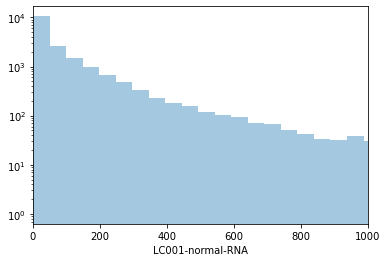

In [12]:
ax = sns.distplot(expressions_RNA['LC001-normal-RNA'],kde = False, bins = 10000)
ax.set_xlim(0,1000)
ax.set_yscale('log')

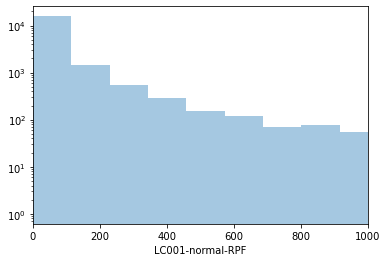

In [13]:
ax = sns.distplot(expressions_RPF['LC001-normal-RPF'],kde = False, bins = 10000)
ax.set_xlim(0,1000)
ax.set_yscale('log')

In [13]:
len(expressions_RNA)

18945

## Задание 1. Определение дифференциальной экспрессии

Вынесем имена генов в отдельный датафрейм

In [14]:
genes = expressions.index
genes_df = pd.DataFrame({"geneSymbol":genes})
genes_df

,geneSymbol
0,TSPAN6
1,TNMD
2,DPM1
3,SCYL3
4,C1orf112
...,...
18940,RP1-34B20.21
18941,RP11-511P7.5
18942,KLF18
18943,TRBV6-2


1. Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные каунты.

In [17]:
spearman_corr = [] # Была выбрана корреляция Спирмена тк не нормированные каунты
for i in range(0, len(expressions_RNA)):
    spearman_corr += [pd.DataFrame(expressions_RNA.iloc[i].values).corrwith(pd.DataFrame(expressions_RPF.iloc[i].values), axis = 0, method = 'spearman')]

/Users/kseniadey/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [18]:
spearman_corr = pd.DataFrame(spearman_corr)
spearman_corr

,0
0,NaN
1,-0.147807
2,0.849624
3,0.697779
4,0.811583
...,...
18940,0.382301
18941,0.191364
18942,NaN
18943,NaN


In [19]:
genes_df = genes_df.join(spearman_corr)
genes_df

,geneSymbol,0
0,TSPAN6,NaN
1,TNMD,-0.147807
2,DPM1,0.849624
3,SCYL3,0.697779
4,C1orf112,0.811583
...,...,...
18940,RP1-34B20.21,0.382301
18941,RP11-511P7.5,0.191364
18942,KLF18,NaN
18943,TRBV6-2,NaN


In [20]:
genes_df = genes_df.rename(columns = {0:'corr'})
genes_df

,geneSymbol,corr
0,TSPAN6,NaN
1,TNMD,-0.147807
2,DPM1,0.849624
3,SCYL3,0.697779
4,C1orf112,0.811583
...,...,...
18940,RP1-34B20.21,0.382301
18941,RP11-511P7.5,0.191364
18942,KLF18,NaN
18943,TRBV6-2,NaN


Есть NaN по корреляциям, посмотрим, у каих еще генов так:

In [21]:
genes_df[genes_df.isnull().any(axis=1)]

,geneSymbol,corr
0,TSPAN6,NaN
24,WNT16,NaN
177,PAX6,NaN
191,NOX1,NaN
201,TFAP2D,NaN
...,...,...
18935,RP11-96L14.8,NaN
18937,AKR1C3,NaN
18939,TRBV7-2,NaN
18942,KLF18,NaN


GeneCards для некоторых генов:

PAX6 -- экспрессируется при развитии глаз, носа, центральной нервной системы и поджелудочной железы;

TRBV6-2 -- экспрессируется в тимусе;

WNT16 -- в зависимости от варианта экспрессируется в поджелудочной железе (variant 1) или в плаценте, селезенке, почках, головном мозгу и сердце (variant 2).

А мы имеем дело с гепатоцитами(клетками печени).

In [21]:
# вероятно имеет смысл NaN удалить
genes_df = genes_df.dropna()

In [22]:
len(genes_df)

18945

2. Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

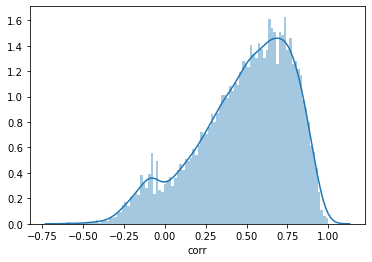

In [23]:
sns.distplot(genes_df['corr'], bins = 100)

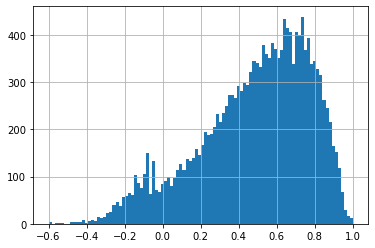

In [24]:
genes_df['corr'].hist(bins=100)

Посмотрим гены с очень высокой корреляцией

In [45]:
(genes_df[genes_df['corr'] >= 0.98]).head(20)

,geneSymbol,corr
4534,PRG4,0.990977
5495,SCGB1D2,1.000000
8121,KCNA10,1.000000
9747,HKDC1,0.980053
9754,PRG3,1.000000
11889,CYP7A1,0.980820
12719,LGALS4,0.981942
13158,FAM46D,1.000000
13477,TMPRSS7,1.000000
13578,MAGEB6,1.000000


Посмотрим гены с очень маленькой корреляцией

In [43]:
(genes_df[genes_df['corr'] <= 0.01]).head(20)

,geneSymbol,corr
1,TNMD,-0.147807
56,ARHGAP33,-0.173421
59,SLC22A16,-0.203751
75,HOXA11,-0.017008
85,SPPL2B,-0.061370
100,SOX8,-0.561372
120,CACNG3,-0.138991
130,MAP3K9,-0.160994
133,KDM7A,0.006396
152,SCIN,-0.088558


Посмотрев некоторые гены с низкой и высокой корреляции в исходной таблице,заметно,что у  генов с низкой корреляцией колличество каунтов RiboSeq значительно меньше, чем RNASeq. А гены с высокой корреляцией, вероятно, гены домашнего хозяйства, некоторые из них, по крайней мере.

3. Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Для этого можете использовать *DESeq2* или *edgeR* (для *DESeq* есть обёртка на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? Выводы подкрепите графиками.


Выполненно в R, с использованием edgeR

# Задание 2 . Анализ wig-файла

0. Чтение wig-файлов

In [46]:
def wig_parser(file, gsize):
    counts = np.zeros(gsize)
    with open(file, 'r') as file:
        file.readline()
        for line in file:
            data = line.split()
            position, count = int(data[0]), int(data[1])
            position = position - 2
            counts[position] = count
        return counts

In [47]:
forward = wig_parser('02. RiboSeq_EColi_track_f.wig', 4641668)
print(forward)

[0. 0. 0. ... 0. 1. 0.]


In [48]:
reverse = wig_parser('02. RiboSeq_EColi_track_r.wig', 4641668)
print(reverse)

[0. 0. 0. ... 0. 0. 0.]


Загрузка аннотации c GenBank

In [51]:
from BCBio import GFF

genbank_filename = "sequence.gff3"
genbank_file = open(genbank_filename)
records = list(GFF.parse(genbank_file, limit_info = {"gff_type": ["CDS"]}))
genbank_file.close()
record = records[0]

1. Присутствует ли в покрытии генома неравномерность? Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? Присутствует ли там периодичность в три нуклеотида? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? Выводы проиллюстрируйте графиками.

In [52]:
features = []
for feature in record.features:
    if feature.type == "CDS":
        features.append(feature)
        
coverage = 150 # пробный просмотр в IGV не показался информативным, попробовали взять участок в 150 нуклеотидов
gene_counts = {}
pos_counts = np.zeros(coverage, dtype = np.float64)
for feature in features:
    if feature.location.strand > 0:
        counts = forward
    else:
        counts = reverse
    start, end = feature.location.nofuzzy_start, feature.location.nofuzzy_end
    length = end - start
    if length % 3 != 0:
        raise Exception("Not devided by 3!") 
    gene_counts[feature.id] = counts[start:end].sum()
    if length >= pos_counts.size:
        s, e = start, start + pos_counts.size
        pos_counts[:] = pos_counts[:] + counts[s:e]

In [53]:
pos_counts.size

150

Text(0.5, 0, 'Position')

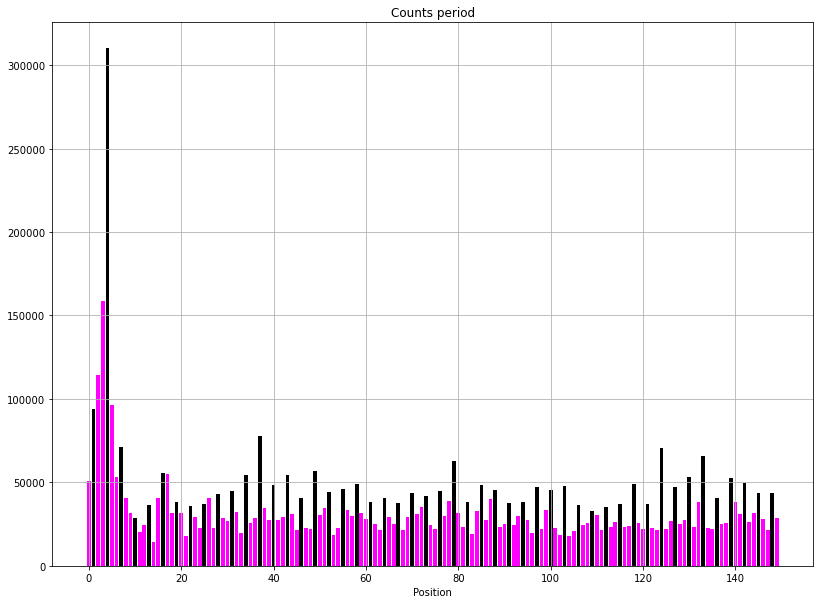

In [54]:
position = np.arange(pos_counts.size)
fig = plt.figure(figsize = (30,10));
ax = fig.add_subplot(121);
xticks = np.arange(pos_counts.size, step = 10);
ax.bar(position, pos_counts, color = ['black' if i % 3 == 1 else 'fuchsia' for i in position]);
ax.grid();
ax.set_title("Counts period")
ax.set_xlabel("Position")

На начальных позициях периодичность в 3 нуклеотида не наблюдается,однако, чем дальше позиция, видно, что каждый 3 третий нуклеотид показывает более высокое значение. Также прослеживается что каждый ~ 40 пик (черный) выше чем все остальные.

2. Рассчитайте значения RPKM и TPM для каждого гена. В чём разница между RPKM и TPM? Для чего используется каждая метрика?

Данные метрики используются для нормирования глубины прочтения и длинны гена. 


Принципиальное отличие в том, что при подсчете ТРМ сначала производится нормирование для длинны и только после нормирование для глубины прочтения. Сумма всех ТРМ в каждом из образцов одинакова,что облегчает сравнение доли прочтений, картированных на геном в образцах. В то время как RPKM -- сумма нормированных ридов отличны от образца к образцу, что приводит к тому что данная метрка не сопоставима в различных образцах. Таким образом, спомощью TPM можно сравнить между собой несколько образцов.

In [57]:
RPKM = {}
TPM = {}

library_size = sum(gene_counts.values())
for feature in features:
    start, end = feature.location.nofuzzy_start, feature.location.nofuzzy_end
    length = end - start
    if length % 3 != 0:
        raise Exception("Not devided by 3!") 
    RPKM[feature.id] = gene_counts[feature.id] * 10**9 / (library_size * length)
    TPM[feature.id] = gene_counts[feature.id] * 10**6 / length

3. Проанализируйте значения RPKM для генов из оперона ATP. Укажите геномные координаты оперона, а также то, какие гены в него входят. Есть ли разница между RPKM у различных генов, присутствующих в опероне? Как вы можете объяснить эту разницу с биологической точки зрения? Как вы думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

In [58]:
ATP = []
for feature in features:
    if "ATP synthase" in feature.qualifiers["product"][0]:
        ATP += [feature]
        
for f in ATP:
    print(f"id: {f.id}" + f"\tloc:{f.location}" + f"\tproduct: {f.qualifiers['product']}")

id: cds-AAC75008.1	loc:[2016553:2017927](+)	product: ['flagellum-specific ATP synthase FliI']
id: cds-AAC76754.1	loc:[3915552:3915972](-)	product: ['ATP synthase F1 complex subunit epsilon']
id: cds-AAC76755.1	loc:[3915992:3917375](-)	product: ['ATP synthase F1 complex subunit beta']
id: cds-AAC76756.1	loc:[3917401:3918265](-)	product: ['ATP synthase F1 complex subunit gamma']
id: cds-AAC76757.1	loc:[3918315:3919857](-)	product: ['ATP synthase F1 complex subunit alpha']
id: cds-AAC76758.1	loc:[3919869:3920403](-)	product: ['ATP synthase F1 complex subunit delta']
id: cds-AAC76759.1	loc:[3920417:3920888](-)	product: ['ATP synthase Fo complex subunit b']
id: cds-AAC76760.1	loc:[3920949:3921189](-)	product: ['ATP synthase Fo complex subunit c']
id: cds-AAC76761.1	loc:[3921235:3922051](-)	product: ['ATP synthase Fo complex subunit a']
id: cds-AAC76762.2	loc:[3922059:3922440](-)	product: ['ATP synthase accessory factor AtpI']


In [59]:
ATP_con = ATP[1:]
for gene in ATP_con:
    print(f"qualifier:{gene.qualifiers['product'][0]}" + f"\tRPKM:{RPKM[gene.id]}")

qualifier:ATP synthase F1 complex subunit epsilon	RPKM:1141.25772518656
qualifier:ATP synthase F1 complex subunit beta	RPKM:2526.824167189789
qualifier:ATP synthase F1 complex subunit gamma	RPKM:604.8768401142592
qualifier:ATP synthase F1 complex subunit alpha	RPKM:1964.8294829509189
qualifier:ATP synthase F1 complex subunit delta	RPKM:725.7274527231382
qualifier:ATP synthase Fo complex subunit b	RPKM:1130.6014870617732
qualifier:ATP synthase Fo complex subunit c	RPKM:12346.851339760828
qualifier:ATP synthase Fo complex subunit a	RPKM:1162.489084653384
qualifier:ATP synthase accessory factor AtpI	RPKM:55.119793183752


Из столбца RPKM заметно, что значения для разных генов отличаются, в некоторых случаях достаточно сильно. Таким образом, можно предположить, что при помощи классического RNASeq эту разницу определить не получилось. Так как хоть и гены отдельные, образуя оперон они экспрессируются вместе.